In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def imshow(titles=None, images=None, size=5):
    '''This function plots 1 or more images read by OpenCV'''
    # If titles and images are not lists, convert them to lists
    if not isinstance(titles, list):
        titles = [titles]
    if not isinstance(images, list):
        images = [images]

    num_images = len(images)

    # Create a subplot with the desired number of columns
    fig, axes = plt.subplots(1, num_images, figsize=(size * num_images, size))

    # Ensure axes is always treated as a list
    if num_images == 1:
        axes = [axes]

    # Iterate through titles and images to display them
    for i in range(num_images):
        w, h = images[i].shape[0], images[i].shape[1]
        aspect_ratio = w / h
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].set_title(titles[i])
       # axes[i].axis('off')  # Turn off axis labels

    plt.show()

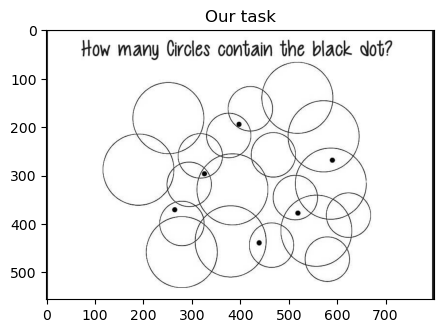

In [38]:
# Read the image
img = cv2.imread('circles_img.png')
imshow('Our task', img)

In [4]:
# No need for preprocessing, the image is already clear and in 2 scale color

In [42]:
# Use Hough Circle Transform to detect circles
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,  # Inverse ratio of the accumulator resolution
    minDist=50,  # Minimum distance between detected centers
    param1=100,  # Upper threshold for the Canny edge detector
    param2=30,   # Threshold for center detection
    minRadius=10,  # Minimum radius
    maxRadius=50   # Maximum radius
)

In [7]:






if circles is not None:
    # Convert the (x, y) coordinates and radius of the circles to integers
    circles = np.uint16(np.around(circles))

    # Draw the circles on the original image
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]

        # Extract the region of interest around the detected circle
        roi = img[i[1]-radius:i[1]+radius, i[0]-radius:i[0]+radius]

        # Check if the ROI contains a black dot
        if np.mean(roi) < 110:  # Adjust the threshold based on your image
            cv2.circle(img, center, radius, (0, 255, 0), 2)

# Display the result

In [9]:
image = img.copy()

And HOUGH_GRADIENT_ALT helps us find all the empty circles. However it also matched the circles in text. We could preprocess this image and delete the top part with the text or try to eliminate those circles. Since the circles in text are of a diffrent size both approaches seems to be eazy. Just for a practice sake we will do it both ways.

I apologize for the confusion. The cv2.HoughCircles function in OpenCV only supports two methods: HOUGH_GRADIENT and HOUGH_GRADIENT_ALT for circle detection. The HOUGH_STANDARD and HOUGH_PROBABILISTIC methods are not available for this function.

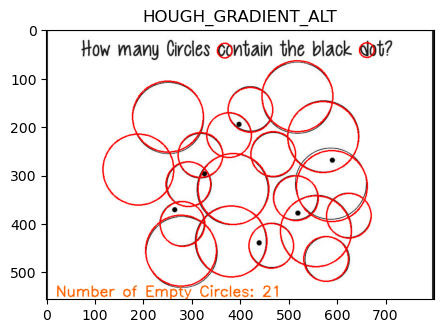

In [130]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the parameters for HoughCircles
dp = 1.2  # Inverse ratio of the accumulator resolution to the image resolution
minDist = 10  # Minimum distance between the centers of detected circles
param1 = 80  # Upper threshold for the internal Canny edge detector
param2 = 0.9  # Threshold for center detection. The lower it is, the more false circles may be detected
minRadius = 0  # Minimum radius of the circles to be detected
maxRadius = 0  # Maximum radius of the circles to be detected

# HOUGH_GRADIENT
#circles_gradient = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

# HOUGH_GRADIENT_ALT
circles_gradient_alt = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

# Draw the detected circles on a copy of the original image
#output_gradient = image.copy()
output_gradient_alt = image.copy()

# if circles_gradient is not None:
#     circles_gradient = np.uint16(np.around(circles_gradient))
#     for i in circles_gradient[0, :]:
#         cv2.circle(output_gradient, (i[0], i[1]), i[2], (0, 255, 0), 2)

if circles_gradient_alt is not None:
    circles_gradient_alt = np.uint16(np.around(circles_gradient_alt))
    for i in circles_gradient_alt[0, :]:
        cv2.circle(output_gradient_alt, (i[0], i[1]), i[2], (0, 0, 255), 2)


text = "Number of Empty Circles: " + str(len(circles_gradient_alt[0, :]))
cv2.putText(output_gradient_alt, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

imshow(['HOUGH_GRADIENT_ALT'], [output_gradient_alt])

First approach is to exclude the circles from text based on their size

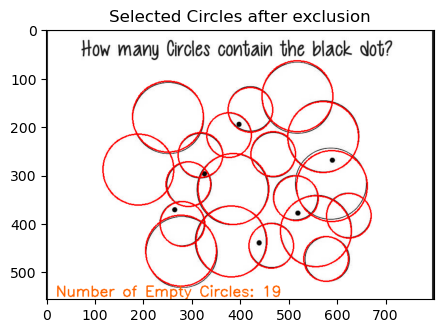

In [129]:
image_copy = img.copy()
# Extract radii from circles_gradient_alt
radii = circles_gradient_alt[0, :, 2]

# Sort the radii in descending order
sorted_radii_indices = np.argsort(radii)[::-1]

# Keep the circles with the largest radii (excluding the two smallest)
num_circles_to_keep = max(2, len(sorted_radii_indices) - 2)
selected_indices = sorted_radii_indices[:num_circles_to_keep]

# Extract the circles with the largest radii
selected_circles = circles_gradient_alt[0, selected_indices]

# Display the selected circles
for circle in selected_circles:
    center = (circle[0], circle[1])
    radius = circle[2]
    cv2.circle(image_copy, center, radius, (0, 0, 255), 2)

# Display number of circles
text = "Number of Empty Circles: " + str(len(selected_circles))
cv2.putText(image_copy, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Display the result
imshow('Selected Circles after exclusion', image_copy)


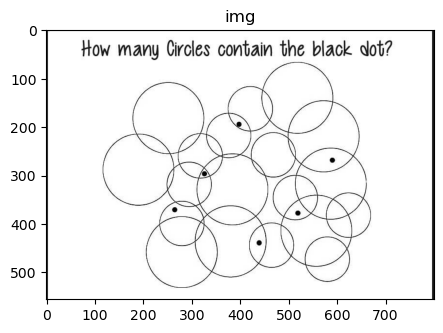

In [40]:
imshow('img',img)

Second approach is to cut the text from the image

In [49]:
img.shape

(556, 800, 3)

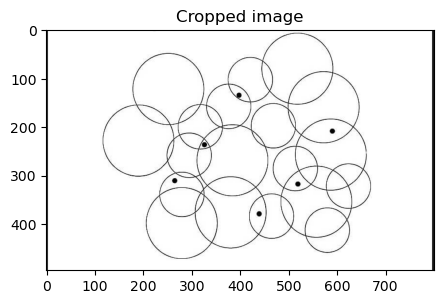

In [53]:
h = 60
image_crop = img[h:]
imshow('white image', image_crop)

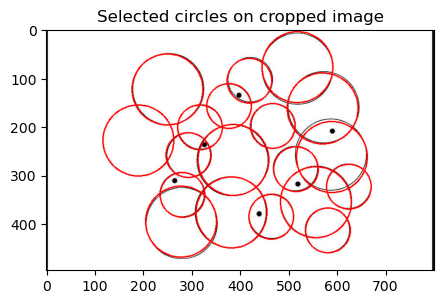

In [127]:
gray_cropped= cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY)
circles_gradient_alt_cropped= cv2.HoughCircles(gray_cropped, cv2.HOUGH_GRADIENT_ALT, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
output_gradient_alt_cropped = image_crop.copy()

if circles_gradient_alt_cropped is not None:
    circles_gradient_alt_cropped = np.uint16(np.around(circles_gradient_alt_cropped))
    for i in circles_gradient_alt_cropped[0, :]:
        cv2.circle(output_gradient_alt_cropped, (i[0], i[1]), i[2], (0, 0, 255), 2)

imshow(['Selected circles on cropped image'], [output_gradient_alt_cropped])

Bonus - make text just like the backgroud - white

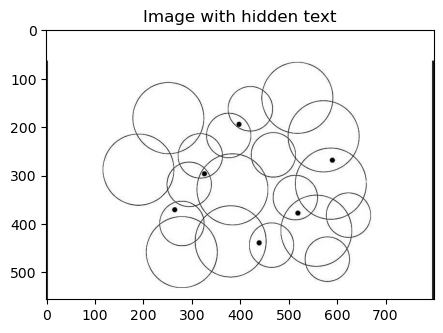

In [70]:
image_white = img.copy()
h0 = 65

image_white[:h0].fill(255)

imshow('Image with hidden text', image_white)

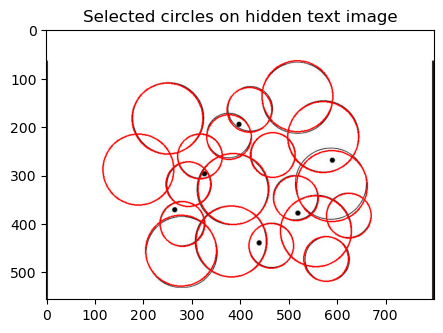

In [126]:
gray_white= cv2.cvtColor(image_white, cv2.COLOR_BGR2GRAY)
circles_gradient_alt_white = cv2.HoughCircles(gray_white, cv2.HOUGH_GRADIENT_ALT, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
output_gradient_alt_white = image_white.copy()

if circles_gradient_alt_white is not None:
    circles_gradient_alt_white = np.uint16(np.around(circles_gradient_alt_white))
    for i in circles_gradient_alt_white[0, :]:
        cv2.circle(output_gradient_alt_white, (i[0], i[1]), i[2], (0, 0, 255), 2)

imshow(['Selected circles on hidden text image'], [output_gradient_alt_white])

We will move on with result of the bonus approach. Now lets find coordinates of black dots and find out how many circles include that points

Simple Blob Detector helped us immediately to find all black dots in the picture

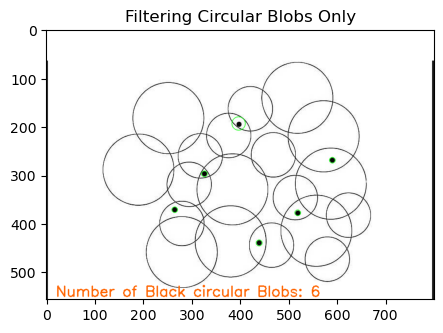

In [137]:
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# #
# params.filterByColor = True
# params.blobColor = 255 
# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.2

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.01
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
keypoints = detector.detect(image_white)


# Draw detected blobs on the original image
result_image = cv2.drawKeypoints(image_white, keypoints, np.array([]), (0, 0, 255),
                                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image_white, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Black circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)

In [138]:
blob_coordinates = []
for keypoint in keypoints:
    x, y = keypoint.pt
    blob_coordinates.append((x, y))

In [139]:
blob_coordinates

[(396.6117858886719, 194.0991668701172),
 (438.97332763671875, 439.98785400390625),
 (518.4488525390625, 377.97894287109375),
 (264.9496154785156, 371.7047424316406),
 (589.957275390625, 269.6962890625),
 (326.05181884765625, 297.88446044921875)]

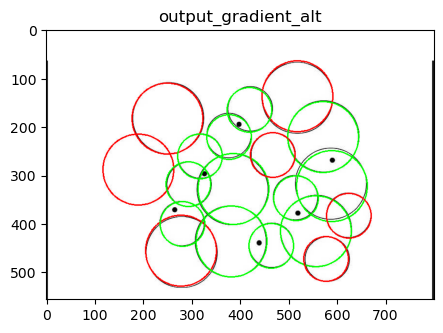

In [151]:
image_marked = image_white.copy()
cnt = 0
# Iterate through detected circles
for i in circles_gradient_alt_white[0, :]:
    center = (i[0], i[1])
    radius = i[2]
    
    # Check if any point is inside the current circle
    point_inside_circle = any(np.linalg.norm(np.array(point) - np.array(center)) <= radius for point in blob_coordinates)

    # Draw the circle in green if it contains any of the points
    if point_inside_circle:
        cv2.circle(image_marked, center, radius, (0, 255, 0), 2)
        cnt += 1 
        
    else:
        cv2.circle(image_marked, center, radius, (0, 0, 255), 2)

imshow('output_gradient_alt', image_marked)

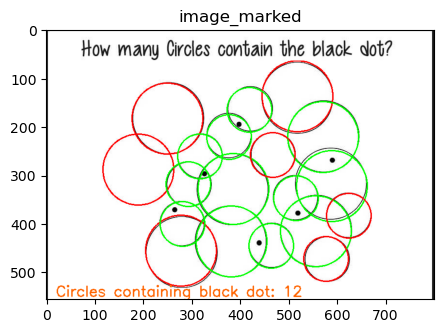

In [153]:
final_image = image_marked.copy()
final_image[:65] = img[:65]

text = "Circles containing black dot: " + str(cnt)
cv2.putText(final_image, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)
imshow('image_marked', final_image)